In [40]:
SKIP_INPUTS = True

from typing import Callable, List

function_index = 0
input_a = 1
input_x = 0
input_b = 1
input_y = 1
h = 0.1
n = 22
should_use_basic = True

if not SKIP_INPUTS:

    functions_string_array = [
        "F(x, y) = (a · x) + (b · y)",
        "F(x, y) = (a · x) − (b · y)",
        "F(x, y) = (a · x) · (b · y)",
        "F(x, y) = (a·x) / (b·y)"
    ]

    functions_formatted_nicely = ""
    for i in range(0, len(functions_string_array)):
        functions_formatted_nicely += f"{i + 1}) {functions_string_array[i]}\n"

    choose_function_prompt = f"Please choose a function F that you want to use by typing the number corresponding to the function:\n{functions_formatted_nicely}"
    choose_parameter_a_prompt = f"Specify parameter 'a' for the function {functions_string_array[function_index]}"
    choose_parameter_x_prompt = f"Specify variable 'x' for the function {functions_string_array[function_index]}"
    choose_parameter_b_prompt = f"Specify parameter 'b' for the function {functions_string_array[function_index]}"
    choose_parameter_y_prompt = f"Specify variable 'y' for the function {functions_string_array[function_index]}"
    choose_step_prompt = "Choose step (h)"
    choose_level_prompt = "Please specify whether to use [B]asic or [A]dvanced Euler method"
    choose_number_of_iterations_prompt = "Choose number of iterations (n)"

    function_index = int(input(choose_function_prompt)) - 1
    input_a = float(input(choose_parameter_a_prompt))
    input_x = float(input(choose_parameter_x_prompt))
    input_b = float(input(choose_parameter_b_prompt))
    input_y = float(input(choose_parameter_y_prompt))
    h = float(input(choose_step_prompt))
    n = int(input(choose_number_of_iterations_prompt))
    should_use_basic = input(choose_level_prompt) == 'B'


In [41]:

functions: List[Callable[[float, float, float, float], float]] = [
    lambda a, b, x, y,: (a * x) + (b * y),
    lambda a, b, x, y,: (a * x) - (b * y),
    lambda a, b, x, y,: (a * x) * (b * y),
    lambda a, b, x, y,: (a * x) / (b * y)
]

function: Callable[[float, float], float] = lambda x, y: functions[function_index](input_a, input_b, x, y)

In [42]:
def basic_euler_method(x_0: float, y_0: float, count: int, step:float, f: Callable[[float, float], float]):
    x = [0] * (count + 1)
    y = [0] * (count + 1)

    x[0] = x_0
    y[0] = y_0

    for count in range(0, count):
        x[count + 1] = x[0] + count * step
        y[count + 1] = y[count] + step * f(x[count], y[count])

    return x, y

def improved_euler_method(x_0: float, y_0: float, count: int, step:float, f: Callable[[float, float], float]):
    x = [0] * (count + 1)
    y = [0] * (count + 1)

    x[0] = x_0
    y[0] = y_0

    for i in range(1, count + 1):
        x[i] = x[0] + i * step


    for i in range(0, count):
        x_star = 0.5 * (x[i] + x[i+1])
        y_star = y[i] + 0.5 * step * f(x[i], y[i])
        m_star = f(x_star, y_star)
        y[i+1] = y[i] + step * m_star

    return x, y

In [43]:
draw_x, draw_y = [], []

if should_use_basic:
    draw_x, draw_y = basic_euler_method(input_x, input_y,n, h, function)
else:
    draw_x, draw_y = improved_euler_method(input_x, input_y,n, h, function)

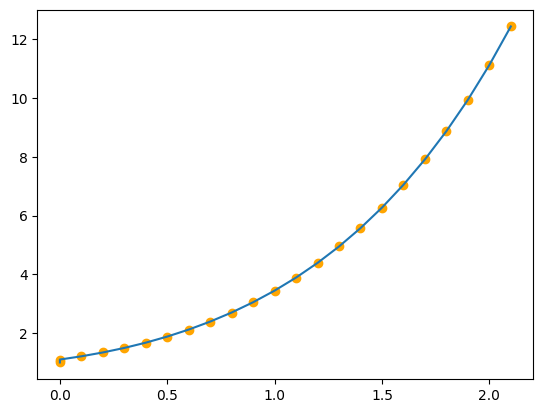

In [44]:
import matplotlib.pyplot as plot

plot.scatter(draw_x, draw_y, c="orange")
plot.plot(draw_x, draw_y)